<a href="https://colab.research.google.com/github/daonly/2024Spring/blob/main/SW_%E1%84%80%E1%85%B5%E1%84%8E%E1%85%A9_%E1%84%90%E1%85%A9%E1%84%91%E1%85%B5%E1%86%A8%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF%E1%84%85%E1%85%B5%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#토픽모델링을 시작하기 이전에

토픽모델링이 무엇이고 어떤 데이터를 활용할 수 있으며 과정을 거쳐 어떤 결과를 가져오는지에 대한 전반적인 이해를 위해서는 다음의 기사들이 도움이 될 것 같아요:

*지난 29년 동성애 관련 기사의 가장 큰 토픽은 ‘사랑’*
(http://www.hani.co.kr/arti/science/technology/902803.html)

*‘에이즈’에서 ‘인권’으로…기계학습이 드러낸 극적 변화*
(http://www.hani.co.kr/arti/science/technology/904567.html)

In [ ]:
#빠른 런타임 연결을 위해 돌려줍니다

1

1

#토픽모델링이란

방대한 양의 텍스트 자료의 주요 주제를 머신러닝을 통해 추출하는 기법

#시각화를 위한 한글 깨짐 방지


In [ ]:
#나눔폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#설치후 런타임 > 세션 다시 시작 클릭

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig

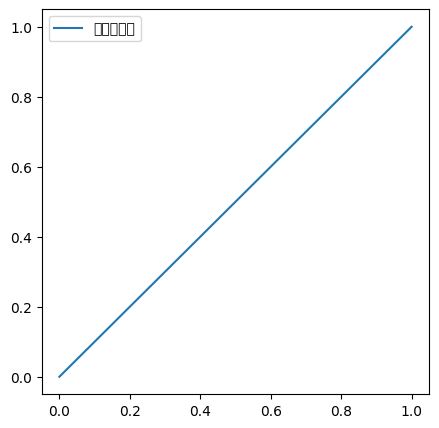

In [ ]:
#런타임을 재시작하신 뒤 위 셀의 코드를 다시 돌리셨다면, 이 셀의 코드를 돌리시면 왼쪽 상단에 '한글테스트'이라는 글씨가 보이실거에요
#만약 왼쪽 상단에 한글이 보이지 않으신다면, 한글깨짐이 있는 겁니다
#런타임을 완전히 초기화 시키신 뒤 위 셀의 코드를 다시 실행해주세요
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1], label='한글테스트')
plt.legend()

#데이터 불러오기


수집 가능한 데이터가 없으시다면 빅카인즈를 통해서 얻으실 수도 있어요: https://www.bigkinds.or.kr/

데이터는 두 가지 방법으로 불러올 수 있습니다.


1) colab에 직접 데이터를 올리는 법

2) google drive와 마운트해서 데이터를 불러오는 법 -- 여기서는 마운트해서 불러오는 방법을 보여드릴게요

In [ ]:
#구글 드라이브와 연결하기
#데이터를 불러오고 분석한 결과물을 내보낼 수 있도록 작업 공간 지정

from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
#작업 공간을 구글 드라이브의 colab notebooks로 설정

import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/') #작업 공간 경로 설정

print(os.getcwd()) #설정된 작업 공간 확인

In [ ]:
#데이터를 불러오기 위해 필요한 pandas를 pd라는 약자를 사용해서 불러옵니다
#저희는 엑셀 형태의 데이터를 활용할건데, 그 데이터를 python에서 dataframe으로 읽을 수 있도록 도와줍니다
#pandas에 대한 자세한 설명은 https://wikidocs.net/32829 여기에서!

import pandas as pd

In [ ]:
#데이터를 불러옵니다
#'weekly_comments.xlsx'라는 파일 df라는 이름으로 불러오기
#pd.read_excel()함수 사용

df=pd.read_excel('weekly_comments.xlsx')

In [ ]:
#기본으로 첫 5개 행이 출력되지만, 괄호 안에 원하는 숫자를 넣으면 그 숫자만큼의 행이 출력돼요
df.head()

In [ ]:
df.tail()

In [ ]:
len(df) #행의 수 보기

In [ ]:
df.shape #행과 열의 수 보기

#전처리 및 형태소 분석

In [ ]:
#결측치 확인하기
#결측치란 빈칸으로 응답자의 응답이 기록되지 않은 것을 의미합니다.
#결측치가 있을 경우 여러가지 분석에 제약이 있으므로 우선 결측치가 있는지 확인한 뒤 제거해줄게요.

df.isna().sum() #결측치를 확인(isna()한 다음 그 수를 세어줌(sum())

In [ ]:
#comment 열에서 결측치가 있는 행이 무엇인지 찾아볼까요?
#NaN: Not a Number, 결측치
NA = df[~df['comment'].apply(lambda x: isinstance(x, str))]
print(NA)

In [ ]:
#결측치 제거하기
#axis = 0 은 행을 제거, axis = 1은 열을 제거

df = df.dropna(axis=0) #전체 데이터 프레임에서 결측치가 있는 행을 제거하고,  그 결과를 다시 df라는 이름으로 저장

#주의: 결측치를 제거한 뒤 그 결과를 원래 데이터와 같은 이름으로 저장하면 되돌릴 수 없어요!
#데이터를 안전하게 보관하고 싶다면 df_new = df.dropna(axis = 0)과 같이 다른 이름으로 저장하면 됩니다

In [ ]:
#1차 전처리
#특수문자, 영어 등을 제거해줄게요. 한글 외 문자들은 분석에 방해가 됩니다
#동의어도 묶어보겠습니다. 이 데이터에는 '얘기'와 '이야기'가 혼용되고 있어 하나로 통일해줄게요

import numpy as np
import re

def clean_str(text):
    if text == np.nan:
        return ''
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text) #해당 패턴(e-mail)이 보이면 빈칸('')으로 처리
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '\n'         #줄바꿈제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern='얘기' #기존 단어
    text=re.sub(pattern=pattern, repl='이야기', string=text) #바꿀 단어
    return text

df['text']=df['comment'].apply(clean_str) #comment에 clean_str 함수를 적용한 결과를 text라는 새로운 열에 저장

In [ ]:
#특수문자 제거 및 동의어 처리가 된 결과가
#'text'라는 새로운 열에 잘 저장되었는지
#확인해볼게요

df.columns

In [ ]:
#클리닝 후 텍스트
df['text'].head()

In [ ]:
#클리닝 전 텍스트
df['comment'].head()

In [ ]:
#형태소 분석을 위한 패키지를 설치해줄거에요

!pip3 install konlpy

In [ ]:
#konlpy에서 '꼬꼬마'라는 형태소 분석기를 사용할거에요
#형태소 분석기에 대한 자세한 설명은 여기를 참고하세요: https://konlpy.org/ko/v0.5.2/

from konlpy.tag import Kkma
kkma=Kkma()

In [ ]:
#꼬꼬마 알아보기
text = "좋아하는 일을 한껏 즐기며 행복에 나를 맡기자. 내가 행복해야 주변도 행복하니까" #아무튼, 뜨개(서라미)

In [ ]:
# 형태소 추출
morphs = kkma.morphs(text)
print(morphs)

In [ ]:
#형태소 추출 및 품사 태깅
pos = kkma.pos(text)
print(pos)

In [ ]:
# 명사만 추출
nouns = kkma.nouns(text)
print(nouns)

In [ ]:
#꼬꼬마를 활용하여형태소를 분석해줄 함수(to_nouns)를 정의해보겠습니다.
#우리는 꼬꼬마로 형태소 분석을 한 뒤, 한 글자 이상의 일반명사만 추출해주는 함수를 정의할거에요.
#여기서 NN은 일반 명사를 뜻하는데, 다른 품사를 쓰고싶은 분들은 http://kkma.snu.ac.kr/documents/?doc=postag 여기를 참고하셔서 바꾸시면 됩니다
#형태소 분석은 기존 형태소 분석기에 구축된 사전을 기준으로 이루어집니다. 따라서 사전에 없는 단어는 유의미한 단어이더라도 인식을 못할 수 있어요.

def to_nouns(text):

    predefined_nouns = ['파이썬', '와이파이'] #형태소 분석기가 인식하지 못하는 '파이썬'과 '와이파이'를 사전에 추가
    nouns = [] #형태소 분석한 결과를 저장할 리스트

    for noun in predefined_nouns: #predefined_nouns에 있다면, 즉 본문에 '파이썬', '와이파이'가 있다면
        if noun in text:
            nouns.append(noun) #nouns(결과)에 추가
            text = text.replace(noun, ' ') #추가적인 형태소 분석으로 발생하는 중복 제거를 위해 원문 단어 제거

    text_pos=kkma.pos(text) #형태소와 품사 태그 추출

    for a,b in text_pos:
        if len(a) > 1: #한 글자 이상
            if 'NN' in b: #일반명사인 경우
                nouns.append(a)
    return nouns

In [ ]:
to_nouns(text)

In [ ]:
#한국어로 불용어, 영어로 stopwords를 처리하는 코드로 분석에서 사용할 때 필요없는 단어들을 제거해줍니다
#의미가 없는 단어들 뿐만 아니라 관심이 없는 단어들도 지워줄거에요
#기본적으로 많이 사용하는 불용어를 사용할 수도 있지만 더 정교한 분석을 위해서는 직접 지정해줘도 좋아요.
#처음에는 어떤 단어를 불용어로 지정해야할지 잘 모를 수 있어요.
#우선 빈도분석을 진행한 후 많은 빈도를 차지하지만 유의미하지 않은 것을 지워주세요

stopwords=['오늘','느낌','기분','생각','하다','이번','사실','주신','다음','무엇','정도','주시','주차','관련','수업', '부분','그동안','진짜','마지막','실제']

In [ ]:
#반복문이 어디까지 진행되었는지 표시해주는 함수에요
#형태소 분석 및 stopwords를 제거 진행율을 표시해줄거에요

from tqdm import tqdm

In [ ]:
#형태소 분석 및 stopwords를 제거해줄거에요

nountexts=[] #nountexts라는 새로운 리스트 형성

for e in tqdm(df['text']): #df의 text열에서
    nounlist=[]
    nounlist=to_nouns(e) #형태소 분석 후 한 글자 초과 일반명사들 중
    nounlist=[e for e in nounlist if not e in stopwords] #stopwords에 해당하지 않는 것 추출하기

    if len(nounlist)>0:
        nountexts.append(nounlist) #결과를 nountexts에 저장하기

In [ ]:
#지금 분석된 단어들은 각 문서 별로 묶여있어요
#nested list(리스트 안의 리스트) 형태로 되어있어요

print(nountexts)

In [ ]:
#빈도분석을 위해 nested list를 풀어 하나의 리스트로 만들어줄게요

all_texts=[]
for doc in nountexts:
    for e in doc:
        all_texts.append(e)

In [ ]:
#추출한 단어의 빈도를 보기 위해 pandas의 Series으로 바꿔줄게요

all_texts=pd.Series(all_texts)

In [ ]:
#순서 매긴 단어들의 각 빈도를 뽑아볼거에요

all_texts.value_counts()

In [ ]:
#어떤 단어가 빈도 top 30을 차지했을까요?

all_texts.value_counts().head(30)

In [ ]:
#결과를 엑셀로 뽑아볼게요
#엑셀로 뽑기 위해 데이터프레임으로 전환합니다

ncount=pd.DataFrame(all_texts.value_counts())

In [ ]:
#이렇게 export된 엑셀파일은 처음에 지정한 위치(colab notebooks)에 있어요

ncount.to_excel('ncount.xlsx')

In [ ]:
#빈도를 바탕으로 워드클라우드도 그려볼게요
#head() 숫자 조정을 통해 표현하고 싶은 단어 갯수를 설정할 수 있어요
#export된 엑셀파일은 처음에 지정한 위치(colab notebooks)에 있어요

from wordcloud import WordCloud
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', #폰트 설정
               background_color='white', width=1000, height=1000) #배경색, 이미지 크기 지정
cloud = wc.generate_from_frequencies(all_texts.value_counts().head(300)) #상위 300개 단어 그리기
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('comments_wordcloud.png') #생성한 워드클라우드 이미지 .png로 저장하기
plt.show()

#토픽모델링

In [ ]:
#토픽모델링을 해주는 gensim이라는 라이브러리입니다

from gensim import corpora, models
import gensim

In [ ]:
#각 단어에 숫자로 id를 부여합니다

dictionary=corpora.Dictionary(nountexts)

In [ ]:
#그 id를 부여받은 단어와 그 사용 빈도를 연결해줄거에요

corpus=[dictionary.doc2bow(text) for text in nountexts]

In [ ]:
#LDA 모델을 사용할거에요
#전체적인 문서들을 모두 분석하여 특정 명사가 주요 키워드로 등장할 확률을 바탕으로
#자주 같이 등장한 단어들을 묶어 토픽으로 설정해줍니다
#간단히 말하면, 이 문서들에서 공통적으로, 또 비슷한 맥락에서 같이 혹은 유사하게 사용되는 단어들을 묶어
#토픽으로 나타내주는 방식이에요
#결론적으로는, '그래서 이 문서들의 주요 주장이 무엇이야?' 하는 질문에 답을 줄 수 있는 기법입니다
#num_topics=10은 한 토픽 수를 10개로 지정해 놓았어요.
#lda는 확률 기반 분석이라 분석할 때마다 결과값이 바뀔 수 있어요. 이를 방지하기 위해 random_state으로 seed를 고정해줍니다.

ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, random_state = 531 )

In [ ]:
#한 토픽당 단어 수는 여기서 바꿀 수 있는데, num_words=로 토픽 당 단어 수를 지정해줄 수 있어요
#ldamodel.print_topics()를 하시면 default 단어 수인 10개로 구성된 10개의 토픽을 볼 수 있어요

ldamodel.print_topics(num_words = 5)

In [ ]:
#뽑힌 토픽들을 엑셀로 옮겨줄거에요
#여기서는 토픽 당 단어를 15개로 지정해보겠습니다.

topicn=ldamodel.print_topics(num_words=15)

In [ ]:
topn =[]

for doc in topicn:
    for e in doc:
        topn.append(e)

In [ ]:
topn = pd.DataFrame(topn)

In [ ]:
#export된 엑셀파일은 처음에 지정한 위치(colab notebooks)에 있어요

topn.to_excel('tpn.xlsx')

#토픽모델링 시각화

In [ ]:
#시각화 패키지 설치

!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
#R = 토픽 당 단어 수 설정, default는 30개 단어
    #(lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
#여기서는 20개로 지정
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary, R = 20)

In [ ]:
lda_viz

In [ ]:
#export된 html 파일은 처음에 지정한 위치(colab notebooks)에 있어요
#다운 받은 뒤 크롬이나 사파리 등으로 여세요

pyLDAvis.save_html(lda_viz, 'topic_models.html')